<a href="https://colab.research.google.com/github/amnahhebrahim/Autoencoders-for-Anomaly-Detection/blob/main/Notebook_Feedforward_NN(MLP)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# !git init
!ls -la



total 24
drwxr-xr-x 1 root root 4096 Oct 25 11:51 .
drwxr-xr-x 1 root root 4096 Oct 25 11:42 ..
drwxr-xr-x 4 root root 4096 Oct 23 13:40 .config
drwx------ 5 root root 4096 Oct 25 11:43 drive
drwxr-xr-x 7 root root 4096 Oct 25 11:51 .git
drwxr-xr-x 1 root root 4096 Oct 23 13:40 sample_data


## Import Necessary Libraries and Dataset:

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install scikit-learn
!pip install --upgrade pip setuptools


### Import Data:

In [4]:
df_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Masters' Work/Dataset/Full dataset/Combined/all_runs_combined.csv")

In [5]:
print("The size of the dataset is as follows:", df_all.shape)

The size of the dataset is as follows: (10570581, 39)


In [6]:
print("Number of Cycles (max):", df_all.Cycle.unique().max())
print("Number of Cycles (min):", df_all.Cycle.unique().min())
# print("Number of Cycles (unique):", len(df_all.Cycle.unique()

Number of Cycles (max): 1000.0
Number of Cycles (min): 1.0


In [7]:
df_all.run_name.unique()

array(['group_run_611_22072025', 'group_run_605_22072025',
       'group_run_606_22072025', 'group_run_609_22072025',
       'group_run_607_22072025', 'group_run_608_22072025',
       'group_run_610_22072025'], dtype=object)

In [8]:

list_of_runs=["group_run_611_22072025","group_run_605_22072025"]
df=df_all[df_all["run_name"].isin(list_of_runs)].copy()

print("Size of new df", df.shape)

Size of new df (3019360, 39)


In [9]:
del df_all #hopefully to avoid ram crash

In [10]:

pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Link_ID,Cycle,Time_Tag_int,rx_timetag2,Elink,FE_id,DM_position,FE_position,chipID,channelID,time_raw,time_end,time_end_q,t1fine,t2fine,qfine,tacID,t1coarse_int,t2coarse_int,qcoarse_int,pcoarse_int,qT1,time,t0,a0,a1,a2,qT2,timeEnd,t0_t2,a0_t2,a1_t2,a2_t2,energy,TOT,tqT,tqE,run_name
0,1071,14.0,1.0,3460.0,49325760.0,0.0,291.0,7.0,10.0,1.0,20.0,1.616307e+12,1.616307e+12,1.616307e+12,724.0,770.0,55.0,4.0,16387.0,3.0,3.0,1008.0,1.359904,1.616307e+12,-0.080208,55.085861,494.82889,-2.166073,1.335641,1.616307e+12,-0.068721,68.102737,526.52130,-0.754562,-14.240576,0.012451,1.279541,1.267090,group_run_611_22072025
1,1072,14.0,1.0,3460.0,49325760.0,0.0,291.0,7.0,10.0,1.0,27.0,1.616307e+12,1.616307e+12,1.616307e+12,762.0,772.0,74.0,6.0,16387.0,3.0,3.0,1008.0,1.331692,1.616307e+12,-0.038042,72.999390,520.62048,-2.427774,1.327599,1.616307e+12,-0.056609,61.857349,535.01447,-0.080675,11.739983,0.022705,1.293701,1.270996,group_run_611_22072025
2,1073,14.0,1.0,3460.0,49325760.0,0.0,291.0,7.0,10.0,1.0,31.0,1.616307e+12,1.616307e+12,1.616307e+12,729.0,740.0,47.0,2.0,16387.0,3.0,4.0,1008.0,1.297821,1.616307e+12,0.004154,53.364655,520.60498,-0.010001,1.267041,1.616307e+12,-0.001199,68.898949,529.67285,-0.010000,-15.025755,0.036133,1.302002,1.265869,group_run_611_22072025
3,1074,14.0,1.0,3460.0,49325760.0,0.0,291.0,7.0,10.0,1.0,1.0,1.616307e+12,1.616307e+12,1.616307e+12,702.0,740.0,57.0,0.0,16387.0,3.0,3.0,1008.0,1.276364,1.616307e+12,-0.001499,71.845001,494.87213,-0.909650,1.260108,1.616307e+12,-0.007957,86.302727,518.77533,-0.010000,-5.445229,0.022949,1.274902,1.251953,group_run_611_22072025
4,1075,14.0,1.0,3460.0,49325760.0,0.0,291.0,7.0,10.0,1.0,4.0,1.616307e+12,1.616307e+12,1.616307e+12,733.0,709.0,72.0,0.0,16387.0,3.0,3.0,1008.0,1.348136,1.616307e+12,-0.062096,53.248604,508.13696,-2.908567,1.300361,1.616307e+12,-0.061212,58.781258,500.78253,-0.579224,9.505785,0.047119,1.286133,1.239014,group_run_611_22072025




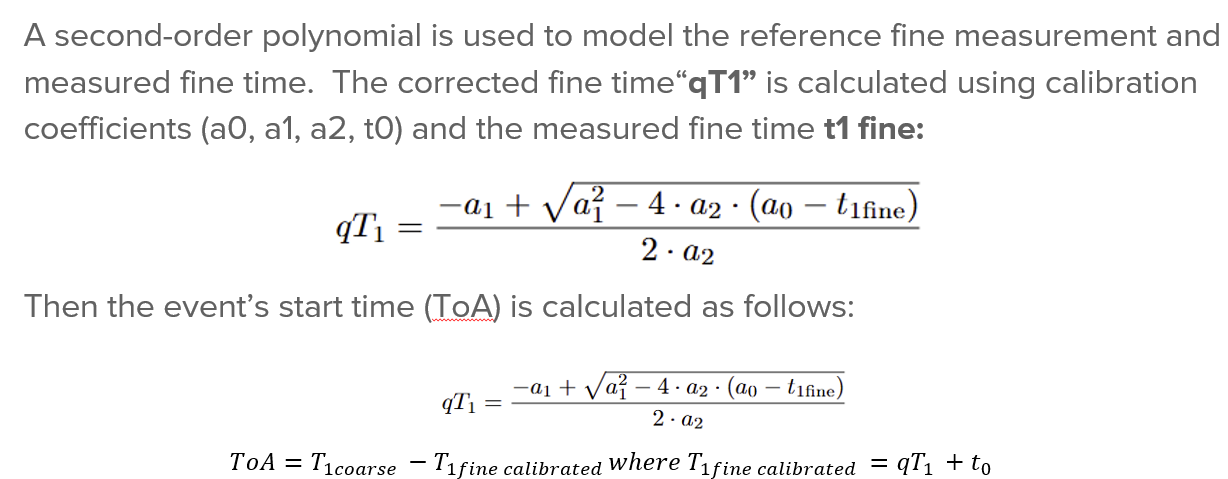

In [11]:
df.isna().sum()

,0
Unnamed: 0,0
Link_ID,0
Cycle,0
Time_Tag_int,0
rx_timetag2,0
Elink,0
FE_id,0
DM_position,0
FE_position,0
chipID,0


In [12]:
df=df.dropna()

# Data Visualization:

See this Google Colab Notebook: https://colab.research.google.com/drive/1g0MdUU2ZNkoex1gZT1Le8cqB3b6J2ekt?usp=sharing




## Data Preparation:

1. Add Features that may assist the MLP to model the physics behavior:

In [13]:
df.columns

Index(['Unnamed: 0', 'Link_ID', 'Cycle', 'Time_Tag_int', 'rx_timetag2',
       'Elink', 'FE_id', 'DM_position', 'FE_position', 'chipID', 'channelID',
       'time_raw', 'time_end', 'time_end_q', 't1fine', 't2fine', 'qfine',
       'tacID', 't1coarse_int', 't2coarse_int', 'qcoarse_int', 'pcoarse_int',
       'qT1', 'time', 't0', 'a0', 'a1', 'a2', 'qT2', 'timeEnd', 't0_t2',
       'a0_t2', 'a1_t2', 'a2_t2', 'energy', 'TOT', 'tqT', 'tqE', 'run_name'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
#Create a new feature that combines both parameters that we seek to predict:
# df["Calibrated_t1fine"]=df["t0"]+df["qT1"]

feature_cols=['Elink', 'channelID','time_raw', "t1fine", "tacID"]
              # "t1coarse_int", "Link_ID"]
target_cols=["t0", "a0","a1","a2"]
# target_cols=["Calibrated_t1fine"]

categorical = ['Elink', 'channelID',"tacID"]
              #  "Link_ID"]
numeric = [c for c in feature_cols if c not in categorical]

unique_elinks=df['Elink'].unique()

# Split elinks into train and test (val+test)
elinks_train_val, elinks_test = train_test_split(
    unique_elinks, test_size=0.15, random_state=42
)



# # Encode 'Link_ID' for train_val and test sets
# le = LabelEncoder()
# df['Link_ID_encoded'] = le.fit_transform(df['Link_ID'])
# numeric+=['Link_ID_encoded']
# print("Numeric Columns are", numeric)
#Split the dataset according to the eLink
df_train_val = df[df['Elink'].isin(elinks_train_val)].copy()
df_test     = df[df['Elink'].isin(elinks_test)].copy()

### Scale Numeric Values:

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_numeric_scaled = scaler_X.fit_transform(df_train_val[numeric])
test_numeric_scaled = scaler_X.transform(df_test[numeric])

train_targets_scaled = scaler_y.fit_transform(df_train_val[target_cols])
test_targets_scaled = scaler_y.transform(df_test[target_cols])

2. Encoding categorical variables: channelID, tacID, maybe Elink → categorical.

- First map each categorical variable to an N-dimensional vector where N is usually the square root of the number of unique values for the category.
- Then replace the categorical variables with that encoding.

In this case, we will try a technique that has been utilized in NLP, which is entity embedding to embed and map our categorical variables.

See: https://medium.com/data-science/enhancing-categorical-features-with-entity-embeddings-e6850a5e34ff


However, the linkID doesn't need to be encoded using entity embedding, as the unique values in 'Link_ID' (4.0 and 14.0) were not mapped to a 0-based index. Therefore, it's more suitable to use LabelEncoder to encode the 'Link_ID' column as implemented above.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks


# Define embedding vocab sizes (from your data)
channel_max = int(df['channelID'].max()) + 1
tac_max = int(df['tacID'].max()) + 1
elink_max = int(df['Elink'].max()) + 1

print("Maximum channel:", channel_max)
print("Maximum TAC:", tac_max)
print("Maximum eLink:", elink_max)

def build_calibration_mlp(numeric_size, channel_vocab, tac_vocab, elink_vocab):
    # --- Input layers ---
    numeric_input = layers.Input(shape=(numeric_size,), name="numeric_input")
    channel_input = layers.Input(shape=(1,), dtype="int32", name="channel_input")
    tac_input = layers.Input(shape=(1,), dtype="int32", name="tac_input")
    elink_input = layers.Input(shape=(1,), dtype="int32", name="elink_input")

    # --- Embedding layers ---
    channel_emb = layers.Embedding(input_dim=channel_vocab, output_dim=8, name="channel_embedding")(channel_input)
    tac_emb = layers.Embedding(input_dim=tac_vocab, output_dim=4, name="tac_embedding")(tac_input)
    elink_emb = layers.Embedding(input_dim=elink_vocab, output_dim=8, name="elink_embedding")(elink_input)

    # Flatten embeddings (since Keras Embedding outputs [batch, 1, emb_dim])
    channel_emb = layers.Flatten()(channel_emb)
    tac_emb = layers.Flatten()(tac_emb)
    elink_emb = layers.Flatten()(elink_emb)

    # --- Numeric processing ---
    numeric_fc = layers.Dense(16, activation="relu", name="numeric_fc")(numeric_input)

    # --- Concatenate all representations ---
    concat = layers.Concatenate()([numeric_fc, channel_emb, tac_emb, elink_emb])

    # --- Fully connected layers ---
    x = layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.001))(concat)
    x = layers.Dropout(0.5)(x)  # Dropout layer with a dropout rate of 0.5
    x = layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.2)(x)
    # --- Output layer ---
    output = layers.Dense(4, name="output")(x)  # 4 regression outputs

    # --- Build model ---
    model = models.Model(
        inputs=[numeric_input, channel_input, tac_input, elink_input],
        outputs=output,
        name="CalibrationMLP"
    )

    return model


numeric_size = train_numeric_scaled.shape[1]
print("numeric inputs size is", numeric_size)
# model = CalibrationMLP(numeric_size, channel_max, tac_max, elink_max)

model = build_calibration_mlp(
    numeric_size=numeric_size,
    channel_vocab=channel_max,
    tac_vocab=tac_max,
    elink_vocab=elink_max
)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

model.summary()


Maximum channel: 32
Maximum TAC: 8
Maximum eLink: 24
numeric inputs size is 2


Model: "CalibrationMLP"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ channel_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tac_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ elink_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_embedding   │ (None, 1, 8)      │        256 │ channel_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tac_embedding       │ (None, 1, 4)      │         32 │ tac_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ elink_embedding     │ (None, 1, 8)      │        192 │ elink_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_fc (Dense)  │ (None, 16)        │         48 │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8)         │          0 │ channel_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4)         │          0 │ tac_embedding[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 8)         │          0 │ elink_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 36)        │          0 │ numeric_fc[0][0], │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      4,736 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 4)         │        132 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,732 (61.45 KB)

 Trainable params: 15,732 (61.45 KB)

 Non-trainable params: 0 (0.00 B)

## Prepare Input Data:


In [16]:
test_inputs = {
    'numeric_input': test_numeric_scaled,
    'elink_input': df_test['Elink'].values,
    'channel_input': df_test['channelID'].values,
    # 'Link_ID_encoded': df_test['Link_ID_encoded'].values,
    'tac_input': df_test['tacID'].values
}

# y_train_val=train_targets_scaled
y_test=test_targets_scaled

In [ ]:
import keras
from sklearn.model_selection import GroupKFold
from keras import models, layers, regularizers, callbacks
from sklearn.preprocessing import StandardScaler

# Define GroupKFold
n_splits=5
gkf = GroupKFold(n_splits)
groups = df_train_val['Elink']   # grouping by Elink
#Storage for fold metrics
fold_scores = []

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_trainval=df_train_val[feature_cols]
y_trainval=df_train_val[target_cols]

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(gkf.split(X_trainval, y_trainval, groups)):
    print(f"\n=== Fold {fold+1}/{n_splits} ===")
    X_tr, X_val = X_trainval.iloc[train_idx], X_trainval.iloc[val_idx]
    y_tr, y_val = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]
    train_numeric_scaled_group = scaler_X.fit_transform(X_tr[numeric])
    train_targets_scaled_group = scaler_y.fit_transform(y_tr[target_cols])

    train_inputs = {
    'numeric_input': train_numeric_scaled_group,
    'elink_input': X_tr['Elink'].values,
    'channel_input': X_tr['channelID'].values,
    # 'Link_ID_encoded': df_train_val['Link_ID_encoded'].values,
    'tac_input': X_tr['tacID'].values
    }

    history = model.fit(
        train_inputs,
        train_targets_scaled_group,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
    )

    # --- Evaluate on validation fold ---
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold+1} - Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    fold_scores.append((val_loss, val_mae))

# Average results
avg_loss = np.mean([x[0] for x in fold_scores])
avg_mae = np.mean([x[1] for x in fold_scores])
print(f"\nAverage across folds - Loss: {avg_loss:.4f}, MAE: {avg_mae:.4f}")


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Masters' Work/calibration_t1fine_nn_newtargets_dropout_regularization.h5")


### Prediction:


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(test_inputs)
y_pred_original = scaler_y.inverse_transform(y_pred)


rmse = np.sqrt(mean_squared_error(df_test[target_cols].values, y_pred_original))
print(f"RMSE: {rmse:.4f}")


In [ ]:
test_loss, test_mae = model.evaluate(test_inputs, y_test, batch_size=32)
print(f"Test Loss: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


In [ ]:
print(df_train_val[numeric + target_cols].describe())
print(df_train_val[numeric + target_cols].isna().sum())


In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot MAE
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

# Suppose your model is named `model`
plot_model(model, to_file='model_dropout_regularization.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image('model_dropout_regularization.png')


## Results:
- Loss: training loss decreases smoothly as the model is being trained.

- Validation loss: small fluctuations but is generally decreasing and showcases no severe overfitting.
- MAE: training MAE and validation MAE are both very low (~0.012–0.015) → model predicts very accurately.


However, when observing the MAE and RMSE for the test dataset, the metrics indicate that the model has overfit, and models the training/validation data perfectly but generalizes poorly on unseen test data.

### Improvement Attempts:
- L2 Regularization

Added kernel_regularizer=l2(0.001) to dense layers → penalizes large weights.

- Dropout

Added Dropout(0.3) after each dense layer → randomly drops 30% of neurons during training.

- Batch Normalization

Added BatchNormalization() after each dense layer → stabilizes learning and reduces overfittin

Data Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Create a new feature that combines both parameters that we seek to predict:
df["Calibrated_t1fine"]=df["t0"]+df["qT1"]

feature_cols=['Elink', 'channelID','time_raw', "t1fine", "tacID", "t1coarse_int", "Link_ID"]
# Y_cols=["t0", "a0","a1","a2"]
target_cols=["Calibrated_t1fine"]

categorical = ['Elink', 'channelID',"tacID","Link_ID"]
numeric = [c for c in feature_cols if c not in categorical]

unique_elinks=df['Elink'].unique()

# Split elinks into train and test (val+test)
elinks_train_val, elinks_test = train_test_split(
    unique_elinks, test_size=0.15, random_state=42
)



# Encode 'Link_ID' for train_val and test sets
le = LabelEncoder()
df['Link_ID_encoded'] = le.fit_transform(df['Link_ID'])
numeric+=['Link_ID_encoded']
print("Numeric Columns are", numeric)
#Split the dataset according to the eLink
df_train_val = df[df['Elink'].isin(elinks_train_val)].copy()
df_test     = df[df['Elink'].isin(elinks_test)].copy()

### Scale Numeric Values:

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_numeric_scaled = scaler_X.fit_transform(df_train_val[numeric])
test_numeric_scaled = scaler_X.transform(df_test[numeric])

train_targets_scaled = scaler_y.fit_transform(df_train_val[target_cols])
test_targets_scaled = scaler_y.transform(df_test[target_cols])

Add numeric features:

In [ ]:
from keras.layers import Dense, Concatenate

input_numeric = Input(shape=(len(numeric),), name="numeric_input")
input_numeric

Modified Model Architecture

In [ ]:
# Embedding layer for the 'eLink' feature
from keras.layers import Input
from keras.models import Model
from keras.layers import Embedding
from keras.layers import Reshape

#N dimension
n_unique_eLink = df['Elink'].nunique()
n_dim_eLinks=int(np.sqrt(df['Elink'].nunique()))
print("The dimension for embedding of elink is", n_dim_eLinks)
input_eLink = Input(shape=(1, ), name="Elink")
output_eLink = Embedding(input_dim=n_unique_eLink+1,
                        output_dim=n_dim_eLinks, name="Elink_embedding")(input_eLink)
output_eLink = Reshape(target_shape=(n_dim_eLinks, ))(output_eLink)


# Embedding layer for the 'channelID' feature
n_unique_ch = df['channelID'].nunique()
n_dim_ch = int(np.sqrt(n_unique_ch))
input_ch = Input(shape=(1, ), name="channelID")
output_ch= Embedding(input_dim=n_unique_ch+1,
                           output_dim=n_dim_ch,
                           name="channelID_embedding")(input_ch)
output_ch = Reshape(target_shape=(n_dim_ch, ))(output_ch)



#Embedding layer for the tacID:
n_unique_tacs = df['tacID'].nunique()
n_dim_tacs = int(np.sqrt(n_unique_tacs))
input_tacs = Input(shape=(1, ),name="tacID")
output_tacs_embed= Embedding(input_dim=n_unique_tacs+1,
                           output_dim=n_dim_tacs,
                           name="tacID_embedding")(input_tacs)
output_tacs = Reshape(target_shape=(n_dim_tacs, ))(output_tacs_embed)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Reshape, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


x = Concatenate()([
    output_eLink,
    output_ch,
    # output_links,
    output_tacs,
    input_numeric
])
# --- Dense layers with regularization ---


dense1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
bn1 = BatchNormalization()(dense1)
drop1 = Dropout(0.3)(bn1)

dense2 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(drop1)
bn2 = BatchNormalization()(dense2)
drop2 = Dropout(0.3)(bn2)

# --- Output layer ---
output_model2 = Dense(1, name='output')(drop2)

# --- Model ---
model_improvement = Model(   inputs=[input_eLink, input_ch,
            # input_links,
            input_tacs, input_numeric], outputs=output_model2)

# --- Compile ---
model_improvement.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_improvement.summary()

Prepare inputs for model:

In [ ]:
train_inputs = {
    'numeric_input': train_numeric_scaled,
    'Elink': df_train_val['Elink'].values,
    'channelID': df_train_val['channelID'].values,
    'Link_ID_encoded': df_train_val['Link_ID_encoded'].values,
    'tacID': df_train_val['tacID'].values
}

test_inputs = {
    'numeric_input': test_numeric_scaled,
    'Elink': df_test['Elink'].values,
    'channelID': df_test['channelID'].values,
    'Link_ID_encoded': df_test['Link_ID_encoded'].values,
    'tacID': df_test['tacID'].values
}

y_train_val=train_targets_scaled
y_test=test_targets_scaled

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_model_improvements = model_improvement.fit(train_inputs, y_train_val, epochs=60, batch_size=64, callbacks=[early_stop])


In [ ]:
model_improvement.save("/content/drive/MyDrive/Colab Notebooks/Masters' Work/calibration_t1fine_fineturned_nn_model.h5")


In [ ]:
test_loss, test_mae = model_improvement.evaluate(test_inputs, y_test, batch_size=64)
print(f"Test Loss: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")